In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
data = 'Downloads/Data Science/adult.csv' 
df = pd.read_csv(data, header=None, sep=',\s')

In [5]:
df.shape 

(32561, 15)

In [7]:
df.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',  'marital_status', 'occupation', 'relationship', 
 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',  'native_country', 'income'] 
df.columns = col_names 
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [11]:
df.head() 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
categorical = [var for var in df.columns if df[var].dtype=='O'] 
print('Terdapat {} variabel kategoris \n'.format(len(categorical))) 
print('Variable kategoris adalah :\n\n', categorical) 

Terdapat 9 variabel kategoris 

Variable kategoris adalah :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [19]:
# tampilkan variabel kategoris 
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [23]:
# check missing values 
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [27]:
for var in categorical:  
 print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [37]:
import numpy as np
# melihat distribusi frekuensi variabel kategori 
for var in categorical:  
    print(df[var].value_counts() / float(len(df)))

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64
marital_status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: coun

In [43]:
# periksa label dalam variabel workclass 
df.workclass.unique() 
unique_values = np.array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',  'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],  dtype=object) 
# check frequency distribution of values in workclass variable 
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [45]:
# ganti nilai '?' dengan `NaN` 
df['workclass'].replace('?', np.NaN, inplace=True)

In [47]:
# chek kembali variable 
df.workclass.value_counts() 

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [51]:
# check label in occupation variable 
df.occupation.unique() 
unique_values = np.array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',  'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',  'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',  'Tech-support', '?', 'Protective-serv', 'Armed-Forces',  'Priv-house-serv'], dtype=object)

In [53]:
# periksa distribusi frekuensi nilai dalam variabel occupation 
df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [55]:
# ganti nilai '?' dengan `NaN` 
df['occupation'].replace('?', np.NaN, inplace=True)
# chek kembali nilai variable 
df.occupation.value_counts() 

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [57]:
# check labels native_country variable 
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [59]:
# periksa distribusi frekuensi nilai dalam variabel native_country 
df.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [61]:
# ganti nilai '?' dengan `NaN` 
df['native_country'].replace('?', np.NaN, inplace=True) 
# chek kembali nilai variable 
df.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [63]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [65]:
# memeriksa kardinalitas dalam variabel kategorikal 
for var in categorical:  
 print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [67]:
# temukan numerical variables 
numerical = [var for var in df.columns if df[var].dtype!='O'] 
print('Terdapat {} numerical variables\n'.format(len(numerical))) 
print('Numerical variables terdiri :', numerical)

Terdapat 6 numerical variables

Numerical variables terdiri : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [69]:
# tampilkan numerical variables 
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [71]:
# check missing values numerical variables 
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [73]:
X = df.drop(['income'], axis=1) 
y = df['income']

In [75]:
# split X dan y menjadi training dan testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 0) 
# check bentuk X_train dan X_test 
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [77]:
# check data types in X_train 
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [81]:
# display categorical variables 
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O'] 
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [83]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O'] 
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [85]:
# print percentage of missing values in the categorical variables in training  set 
X_train[categorical].isnull().mean()


workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [89]:
# print categorical variables with missing data 
for col in categorical: 
 if X_train[col].isnull().mean()>0: 
     print(col, (X_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [95]:
# impute missing categorical variables with most frequent value 
for df2 in [X_train, X_test]: 
 df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)  
df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)  
df2['native_country'].fillna(X_train['native_country'].mode()[0],  inplace=True)  
# check missing values in categorical variables in X_train 
X_train[categorical].isnull().sum()

workclass            0
education            0
marital_status       0
occupation        1278
relationship         0
race                 0
sex                  0
native_country     414
dtype: int64

In [97]:
# check missing values in categorical variables in X_test 
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [99]:
# check missing values in X_train 
X_train.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1278
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     414
dtype: int64

In [101]:
# check missing values in X_test 
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [103]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [105]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [115]:
# import category encoders 
import category_encoders as ce 
# encode remaining variables with one-hot encoding 
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 
 'marital_status',  'occupation', 'relationship',  
 'race', 'sex', 'native_country']) 
X_train = encoder.fit_transform(X_train) 
X_test = encoder.transform(X_test) 
X_train.head() 
X_train.shape


(22792, 107)

In [117]:
X_test.head() 
X_test.shape


(9769, 107)

In [119]:
cols = X_train.columns 
from sklearn.preprocessing import RobustScaler 
scaler = RobustScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 
X_train = pd.DataFrame(X_train, columns=[cols]) 
X_test = pd.DataFrame(X_test, columns=[cols]) 
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# fit the model 
gnb.fit(X_train, y_train) 
GaussianNB(priors=None, var_smoothing=1e-09) 
y_pred = gnb.predict(X_test) 
y_pred 
unique_values = np.array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],  dtype='<U5')

In [125]:
from sklearn.metrics import accuracy_score 
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test,  y_pred)))

Model accuracy score: 0.8008


In [129]:
y_pred_train = gnb.predict(X_train) 
y_pred_train 
unique_values = np.array(['>50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],  dtype='<U5') 
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train,  y_pred_train)))

Training-set accuracy score: 0.8036


In [131]:
# print the scores on training and test set 
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train))) 
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8036
Test set score: 0.8008


In [133]:
# check class distribution in test set 
y_test.value_counts()

income
<=50K    7407
>50K     2362
Name: count, dtype: int64

In [135]:
# check null accuracy score 
null_accuracy = (7407/(7407+2362)) 
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [137]:
# Print the Confusion Matrix and slice it into four pieces 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
print('Confusion matrix\n\n', cm) 
print('\nTrue Positives(TP) = ', cm[0,0]) 
print('\nTrue Negatives(TN) = ', cm[1,1]) 
print('\nFalse Positives(FP) = ', cm[0,1]) 
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5901 1506]
 [ 440 1922]]

True Positives(TP) =  5901

True Negatives(TN) =  1922

False Positives(FP) =  1506

False Negatives(FN) =  440


<Axes: >

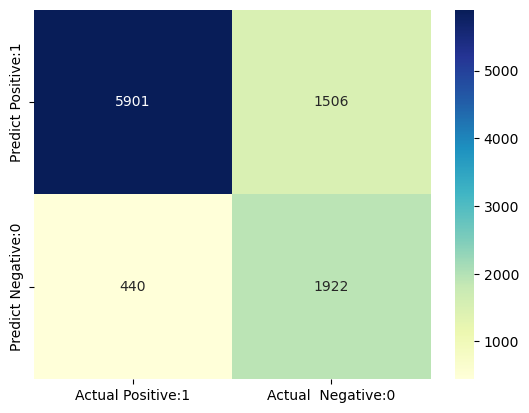

In [139]:
# visualize confusion matrix with seaborn heatmap 
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual  Negative:0'], index=['Predict Positive:1', 'Predict Negative:0']) 
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [141]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      7407
        >50K       0.56      0.81      0.66      2362

    accuracy                           0.80      9769
   macro avg       0.75      0.81      0.76      9769
weighted avg       0.84      0.80      0.81      9769



In [149]:
TP = cm[0,0] 
TN = cm[1,1] 
FP = cm[0,1] 
FN = cm[1,0]
# print classification accuracy 
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN) 
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8008


In [151]:
# print classification error 
classification_error = (FP + FN) / float(TP + TN + FP + FN) 
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1992


In [153]:
recall = TP / float(TP + FN)

In [155]:
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9306


In [157]:
true_positive_rate = TP / float(TP + FN) 
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9306


In [159]:
false_positive_rate = FP / float(FP + TN) 
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4393


In [161]:
specificity = TN / (TN + FP) 
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5607


In [165]:
# print the first 10 predicted probabilities of two classes- 0 and 1 
y_pred_prob = gnb.predict_proba(X_test)[0:10] 
y_pred_prob

array([[9.99999364e-01, 6.35719769e-07],
       [9.99654452e-01, 3.45548221e-04],
       [1.41568903e-01, 8.58431097e-01],
       [1.56812013e-04, 9.99843188e-01],
       [7.40694989e-09, 9.99999993e-01],
       [8.65415751e-01, 1.34584249e-01],
       [9.99999919e-01, 8.11464353e-08],
       [9.99992759e-01, 7.24127727e-06],
       [9.86441110e-01, 1.35588899e-02],
       [9.99999996e-01, 4.44981291e-09]])

In [167]:
# store the probabilities in dataframe 
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K',  'Prob of - >50K']) 
y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999994e-01,6.357198e-07
1,9.996545e-01,3.455482e-04
2,1.415689e-01,8.584311e-01
3,1.568120e-04,9.998432e-01
4,7.406950e-09,1.000000e+00
5,8.654158e-01,1.345842e-01
6,9.999999e-01,8.114644e-08
7,9.999928e-01,7.241277e-06
8,9.864411e-01,1.355889e-02
9,1.000000e+00,4.449813e-09


In [169]:
# print the first 10 predicted probabilities for class 1 - Probability of  >50K 
gnb.predict_proba(X_test)[0:10, 1]

array([6.35719769e-07, 3.45548221e-04, 8.58431097e-01, 9.99843188e-01,
       9.99999993e-01, 1.34584249e-01, 8.11464353e-08, 7.24127727e-06,
       1.35588899e-02, 4.44981291e-09])

Text(0, 0.5, 'Frequency')

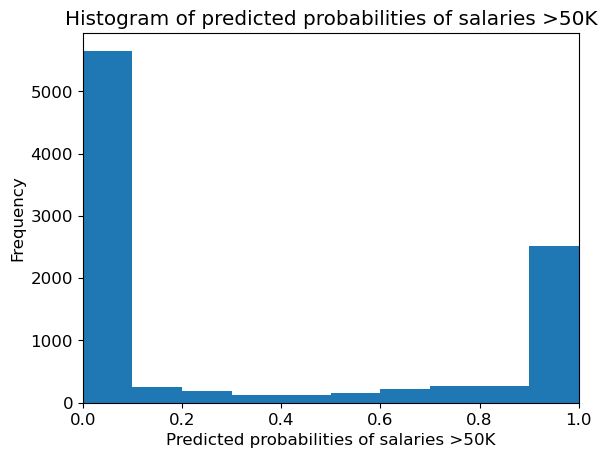

In [173]:
# store the predicted probabilities for class 1 - Probability of >50K 
y_pred1 = gnb.predict_proba(X_test)[:, 1] 
# plot histogram of predicted probabilities 
# adjust the font size  
plt.rcParams['font.size'] = 12 
# plot histogram with 10 bins 
plt.hist(y_pred1, bins = 10) 
# set the title of predicted probabilities 
plt.title('Histogram of predicted probabilities of salaries >50K') 
# set the x-axis limit 
plt.xlim(0,1) 
# set the title 
plt.xlabel('Predicted probabilities of salaries >50K') 
plt.ylabel('Frequency')

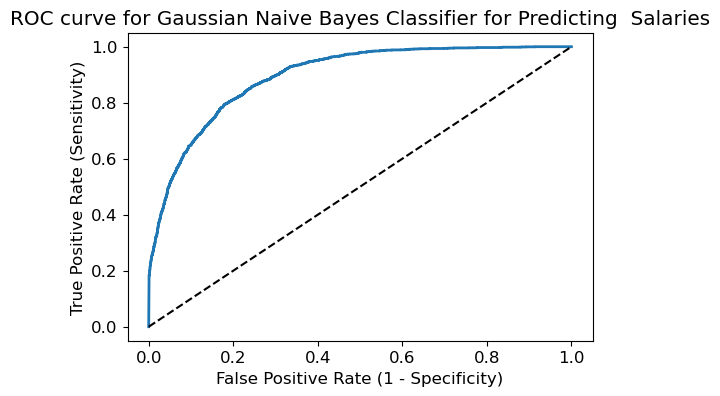

In [177]:
# plot ROC Curve 
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K') 
plt.figure(figsize=(6,4)) 
plt.plot(fpr, tpr, linewidth=2) 
plt.plot([0,1], [0,1], 'k--' ) 
plt.rcParams['font.size'] = 12 
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting  Salaries') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.show()


In [179]:
# compute ROC AUC 
from sklearn.metrics import roc_auc_score 
ROC_AUC = roc_auc_score(y_test, y_pred1) 
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8938


In [181]:
# calculate cross-validated ROC AUC  
from sklearn.model_selection import cross_val_score 
Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5,  scoring='roc_auc').mean() 
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8939


In [185]:
# Applying 10-Fold Cross Validation 
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy') 
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80964912 0.80350877 0.80824923 0.80517771 0.79596314 0.79464677
 0.80517771 0.8095656  0.79859588 0.80605529]


In [187]:
# compute Average cross-validation score 
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8037
